In [1]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
                        30+50*np.sin(a_cyclic),
                        155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  plt.imshow(a)
  plt.show()

In [3]:
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [4]:
Y, X = np.mgrid[0.45:0.65:0.0005, 0.15:0.35:0.0005]
Z = X+1j*Y
xs = tf.constant(Z.astype(np.complex64), name='xs')
zs = tf.Variable(xs, name='zs')
ns = tf.Variable(tf.zeros_like(xs, tf.float32), name='ns')

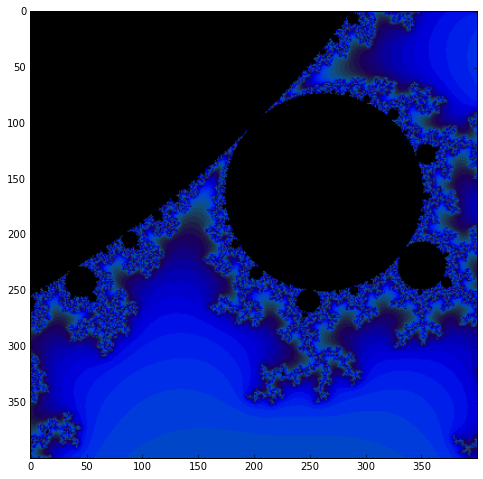

In [5]:
tf.global_variables_initializer().run()
zs_ = zs*zs + xs
not_diverged = tf.abs(zs_) < 4
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32, name='casty'))
  )

for i in range(1500):
    step.run()
    
plt.figure(figsize=(8, 8))
DisplayFractal(ns.eval())
plt.show()

In [6]:
writer = tf.summary.FileWriter(logdir="/tmp/test", graph=sess.graph)
sess.close()
writer.close()